In [54]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

# from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [55]:
#loading data
iris = pd.read_csv('iris.csv')

In [56]:
# reading some random values of the dataset
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
117,7.7,3.8,6.7,2.2,Iris-virginica
98,5.1,2.5,3.0,1.1,Iris-versicolor
127,6.1,3.0,4.9,1.8,Iris-virginica
47,4.6,3.2,1.4,0.2,Iris-setosa
104,6.5,3.0,5.8,2.2,Iris-virginica
28,5.2,3.4,1.4,0.2,Iris-setosa
94,5.6,2.7,4.2,1.3,Iris-versicolor
35,5.0,3.2,1.2,0.2,Iris-setosa
112,6.8,3.0,5.5,2.1,Iris-virginica
96,5.7,2.9,4.2,1.3,Iris-versicolor


In [57]:
# looking the the count of the various species
iris.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [58]:
#checking for duplicate values
iris.duplicated().sum()

3

### There are three duplicates which needs to be dropped

In [59]:
# looking for the duplicated values and dropping them
duplicates = iris[iris.duplicated()]
duplicates

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [60]:
iris = iris.drop_duplicates()

In [61]:
print(iris.duplicated().sum())
print(iris.species.value_counts())

0
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64


- As confirmed, the two duplicates of the species Iris-setosa and the one Iris-virginica duplicates are dropped

In [62]:
#  checking for null values 
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [63]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [64]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [65]:
# finding the average length and width of individual species
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.010417,3.431250,1.462500,0.250000
Iris-versicolor,5.936000,2.770000,4.260000,1.326000
Iris-virginica,6.604082,2.979592,5.561224,2.028571


- The following can be observed generally:
- The iris-setosa has the shortest sepal length,followed by Iris-veriscolor, with Iris-virginica being the longest.
- The trend is similar for petal length, where Iris-setosa have the shortest petal length, followed by Iris-veriscolor, with Iris-virginca being the longest in petal length
- The trend changes with sepal width, where Iris-setosa species have the longest shortest width, seconded by Iris-virginica, with Iris-veriscolor having the shortest width
- Interestingly, the petal width changes again, with Iris-setosa having the shortest width, and Iris-virginica having the longest width, and Iris-veriscolor being in between the two

In [66]:
# Create a list of sepal_lengths for each species
setosa_sepal_lengths = iris[iris["species"] == "Iris-setosa"]["sepal_length"].mean()
print(setosa_sepal_lengths)
versicolor_sepal_lengths = iris[iris["species"] == "Iris-versicolor"]["sepal_length"].mean()
print(versicolor_sepal_lengths)
virginica_sepal_lengths = iris[iris["species"] == "Iris-virginica"]["sepal_length"].mean()
print(virginica_sepal_lengths)

5.010416666666666
5.936
6.60408163265306


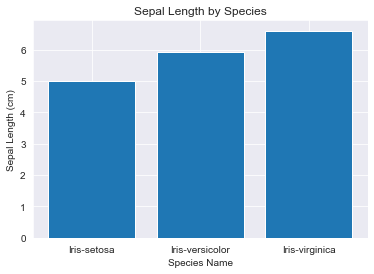

In [67]:
plt.bar(["Iris-setosa", "Iris-versicolor", "Iris-virginica"], [
    setosa_sepal_lengths, versicolor_sepal_lengths, virginica_sepal_lengths
]);
plt.title("Sepal Length by Species")

# Add labels to the x-axis
plt.xlabel("Species Name")

# Add labels to the y-axis
plt.ylabel("Sepal Length (cm)")

# Show the plot
plt.show()

In [68]:
# Create a list of petal_lengths for each species
setosa_petal_lengths = iris[iris["species"] == "Iris-setosa"]["petal_length"].mean()
print(setosa_petal_lengths)
versicolor_petal_lengths = iris[iris["species"] == "Iris-versicolor"]["petal_length"].mean()
print(versicolor_petal_lengths)
virginica_petal_lengths = iris[iris["species"] == "Iris-virginica"]["petal_length"].mean()
print(virginica_petal_lengths)

1.4625000000000001
4.26
5.561224489795917


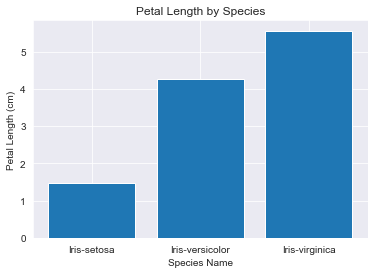

In [69]:
plt.bar(["Iris-setosa", "Iris-versicolor", "Iris-virginica"], [
    setosa_petal_lengths, versicolor_petal_lengths, virginica_petal_lengths
]);
plt.title("Petal Length by Species")
plt.xlabel("Species Name")
plt.ylabel("Petal Length (cm)")
plt.show()

In [70]:
# Create a list of sepal_width for each species
setosa_sepal_width = iris[iris["species"] == "Iris-setosa"]["sepal_width"].mean()
print(setosa_sepal_width)
versicolor_sepal_width = iris[iris["species"] == "Iris-versicolor"]["sepal_width"].mean()
print(versicolor_sepal_width)
virginica_sepal_width = iris[iris["species"] == "Iris-virginica"]["sepal_width"].mean()
print(virginica_sepal_width)

3.4312500000000004
2.7700000000000005
2.979591836734693


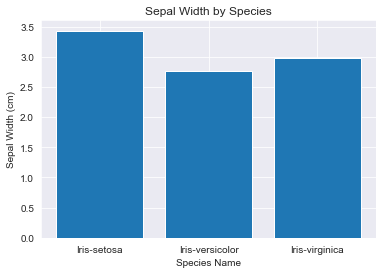

In [71]:
plt.bar(["Iris-setosa", "Iris-versicolor", "Iris-virginica"], 
        [setosa_sepal_width, versicolor_sepal_width, virginica_sepal_width]);
plt.title("Sepal Width by Species")
plt.xlabel("Species Name")
plt.ylabel("Sepal Width (cm)")
plt.show()

In [72]:
# Create a list of petal_width for each species
setosa_petal_width = iris[iris["species"] == "Iris-setosa"]["petal_width"].mean()
print(setosa_petal_width)
versicolor_petal_width = iris[iris["species"] == "Iris-versicolor"]["petal_width"].mean()
print(versicolor_petal_width)
virginica_petal_width = iris[iris["species"] == "Iris-virginica"]["petal_width"].mean()
print(virginica_petal_width)

0.24999999999999992
1.3259999999999998
2.028571428571428


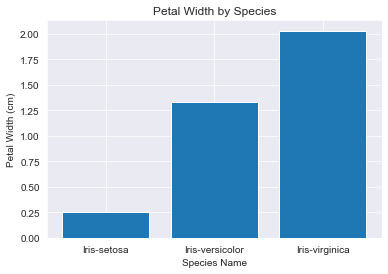

In [73]:
plt.bar(["Iris-setosa", "Iris-versicolor", "Iris-virginica"], 
        [setosa_petal_width, versicolor_petal_width, virginica_petal_width]);
plt.title("Petal Width by Species")
plt.xlabel("Species Name")
plt.ylabel("Petal Width (cm)")
plt.show()

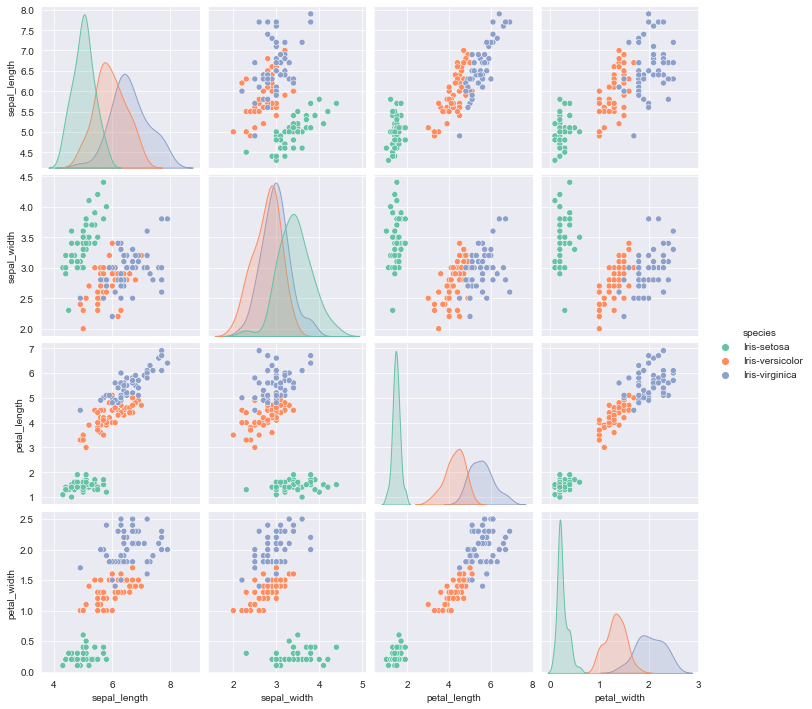

In [75]:
sns.pairplot(iris, hue="species", palette="Set2");


In [76]:
iris_cor = iris.corr()
iris_cor

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


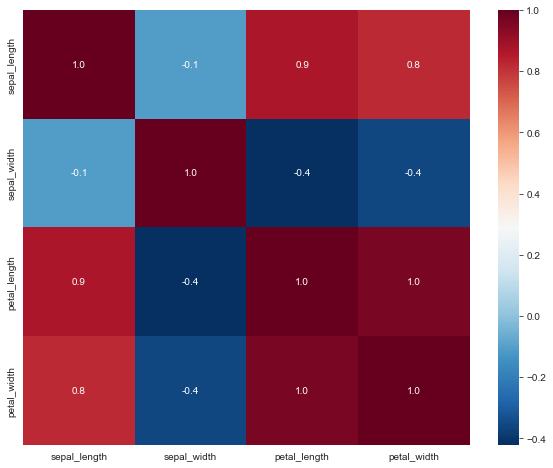

In [77]:
#plot heatmap
cor_iris = iris.drop('species', axis =1)
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cor_iris.corr(), cmap="RdBu_r", fmt= ".1f" ,ax=ax, annot=True);

### Encoding Target Column
- It is important to encode the target column as the machine learning models can only interpret numerical data.

In [78]:
iris["species"] = iris["species"].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})
iris["species"].unique()

array([0, 1, 2], dtype=int64)

In [79]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
93,5.0,2.3,3.3,1.0,1
65,6.7,3.1,4.4,1.4,1
97,6.2,2.9,4.3,1.3,1
114,5.8,2.8,5.1,2.4,2
132,6.4,2.8,5.6,2.2,2


In [80]:
iris["species"].value_counts()

1    50
2    49
0    48
Name: species, dtype: int64

### Splitting Data

In [81]:
# X= iris[['sepal_length', 'sepal_width', 'petal_length','petal_width']].values
# y = iris[['species']].values

X_train, X_test, y_train, y_test = train_test_split(
    iris.drop("species", axis=1), iris["species"], test_size=0.25, random_state=42
)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (110, 4)
Shape of test set: (37, 4)


In [82]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

### 1. Logistic Regression todel Training


In [83]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

model_prediction_1 = logreg.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test, model_prediction_1))



Confusion Matrix: 
 [[14  0  0]
 [ 0  8  2]
 [ 0  0 13]]


In [84]:

print("Classification Report: \n", classification_report(y_test, model_prediction_1))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.80      0.89        10
           2       0.87      1.00      0.93        13

    accuracy                           0.95        37
   macro avg       0.96      0.93      0.94        37
weighted avg       0.95      0.95      0.94        37



In [85]:
logreg_acc = accuracy_score(y_test, model_prediction_1)
print(logreg_acc)

0.9459459459459459


### 2. K Nearest Neighbor KNN

- Finding the optimal error rate

In [86]:
error_rate = []

for i in range(1, 42):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

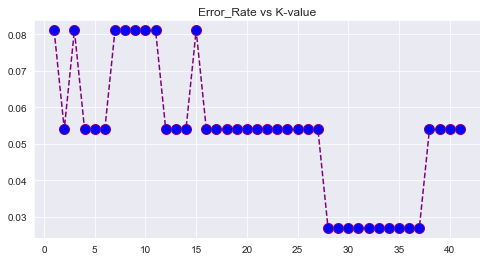

In [87]:
plt.figure(figsize=(8, 4))
plt.plot(
    range(1, 42),
    error_rate,
    color="purple",
    linestyle="--",
    marker="o",
    markersize=10,
    markerfacecolor="b",
)
plt.title("Error_Rate vs K-value")
plt.show()

- ####  From this graph, K value of 28,29,30,31,32,33,34,35,36,37 seem to show the lowest mean error. So using one of these values

In [88]:

knn = KNeighborsClassifier(n_neighbors=35) #ie using 35 out of the available numbers
knn.fit(X_train, y_train)
model_prediction_2 = knn.predict(X_test)

In [89]:
confusion_matrix(y_test, model_prediction_2)

array([[14,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 12]], dtype=int64)

In [90]:
print("Classification Report: \n", classification_report(y_test, model_prediction_2))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        13

    accuracy                           0.97        37
   macro avg       0.97      0.97      0.97        37
weighted avg       0.98      0.97      0.97        37



In [91]:
#check model accuracy

knn_model_acc = accuracy_score(y_test, model_prediction_2)
print("Accuracy of K Neighbors Classifier Model is: ", knn_model_acc)

Accuracy of K Neighbors Classifier Model is:  0.972972972972973


### Decision Tree Model

In [92]:

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
model_prediction_3 = dtc.predict(X_test)

In [93]:
model_accuracy = accuracy_score(y_test, model_prediction_3)
model_accuracy

0.972972972972973